# Medical image analysis with PyTorch

Create a deep convolutional network for an image translation task with PyTorch from scratch and train it on a subset of the IXI dataset for a T1-w to T2-w transformation.

In [ ]:
from glob import glob
import os
import numpy as np
from typing import List
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed

%load_ext autoreload
%autoreload 2

## Step 1: Training and validation data setup

Get the location of the training (and validation) data.
Open a pair of T1-w and T2-w images (the first six characters of the filename identifies a unique subject).

In [2]:
# Data source:
# https://brain-development.org/ixi-dataset/

input_dir = "/home/nbaranov/projects/04_cv/MedicalImageAnalysis/data/small_data/small/"
f_size = (14,8)

In [34]:
t1_dir = os.path.join(input_dir, 't1')
t2_dir = os.path.join(input_dir, 't2')

t1_fns = glob(os.path.join(t1_dir, '*.nii*'))
t2_fns = glob(os.path.join(t2_dir, '*.nii*'))
assert len(t1_fns) == len(t2_fns) and len(t1_fns) != 0

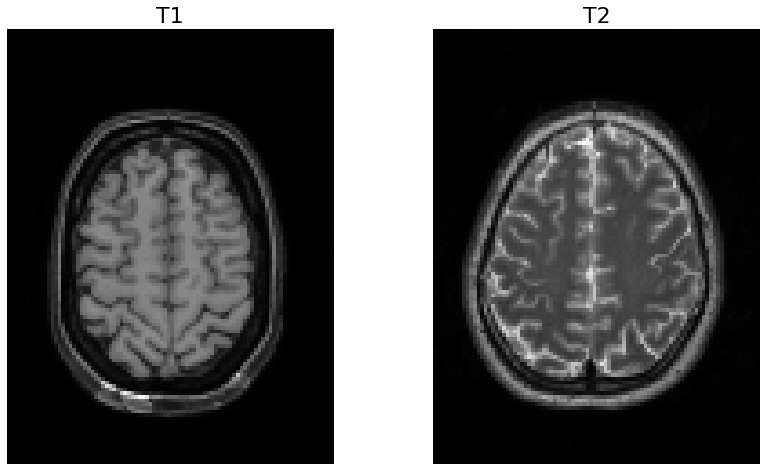

In [35]:
t1_ex, t2_ex = nib.load(t1_fns[0]).get_fdata(), nib.load(t2_fns[0]).get_fdata()
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=f_size)

ax1.imshow(t1_ex[:,90,:], cmap='gray')
ax1.set_title('T1', fontsize=22)
ax1.axis('off')

ax2.imshow(t2_ex[:,90,:], cmap='gray')
ax2.set_title('T2', fontsize=22)
ax2.axis('off');

In [36]:
t1_ex.shape, t2_ex.shape

((120, 120, 90), (120, 120, 90))

### Milestone 1

Look at an axial view of the source T1-weighted (T1-w) and target T2-weighted (T2-w) images.
Plot a slice of the 3D image volume to the screen from both images and verify that the anatomy approximately aligns.

In [37]:
def show_slices(slices: List) -> None:
    """
    Display T1-w and T2-w slices
    """
    fig, axes = plt.subplots(1, len(slices), figsize=f_size)
    for i, s in enumerate(slices):
        axes[i].imshow(s, cmap="gray", origin="lower")
    return None

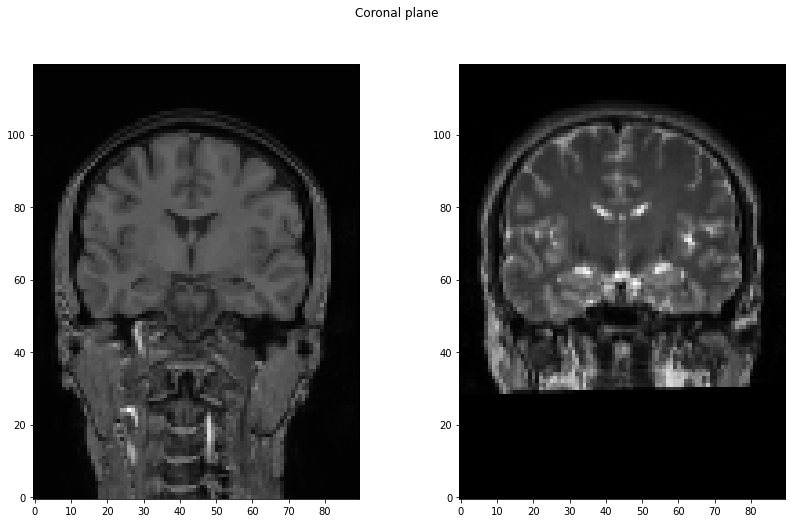

In [39]:
slice_0 = t1_ex[60, :, :]
slice_1 = t2_ex[60, :, :]
show_slices([slice_0, slice_1])
plt.suptitle("Coronal plane");

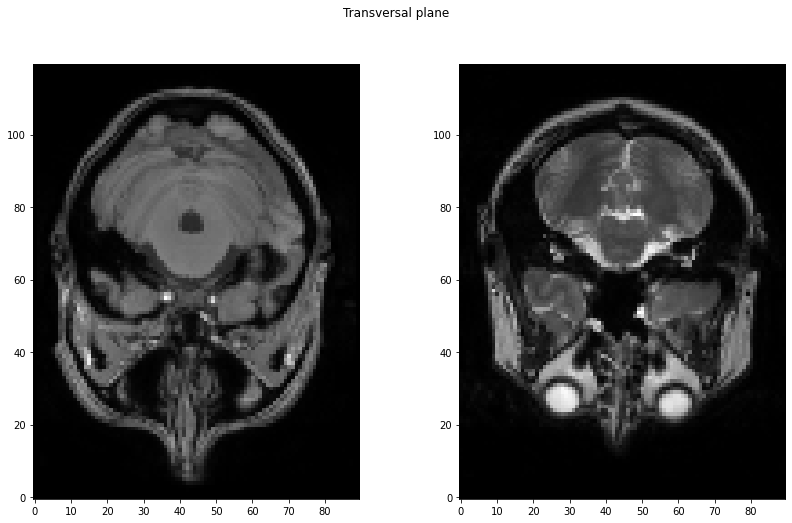

In [40]:
slice_0 = t1_ex[:, 50, :]
slice_1 = t2_ex[:, 50, :]
show_slices([slice_0, slice_1])
plt.suptitle("Transversal plane");

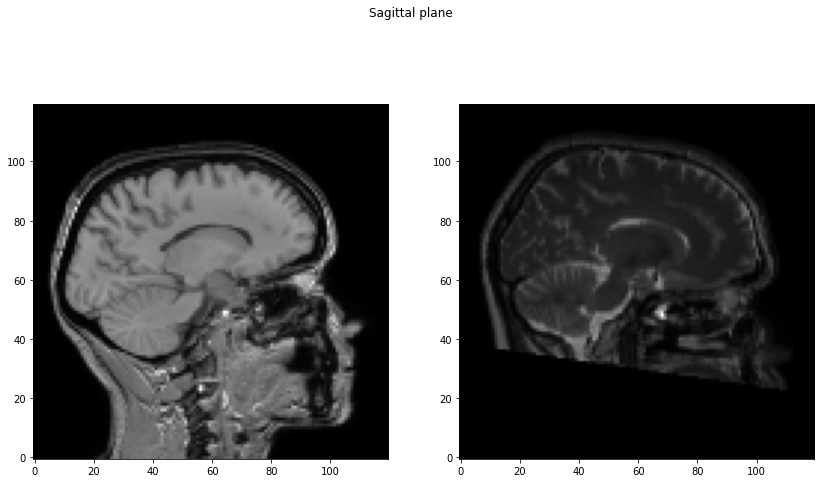

In [41]:
slice_0 = np.rot90(t1_ex[:, :, 50], 3)
slice_1 = np.rot90(t2_ex[:, :, 50], 3)
show_slices([slice_0, slice_1])
plt.suptitle("Sagittal plane");

Hmmm...something wrong with T2-w images

In [42]:
def explore_3dimage(slices, layer: int, axis: str):
    """
    Interactive visualization of MRI slices
    """
    
    plt.figure(figsize=f_size)

    if axis == "sagittal":  
        plt.imshow(np.rot90(slices[:, :, layer], 3), cmap='gray', origin="lower")
        plt.title('sagittal plane', fontsize=20);
    if axis == "transversal":
        plt.imshow(slices[:, layer, :], cmap='gray', origin="lower")
        plt.title('transversal plane', fontsize=20);
    if axis == "coronal":
        plt.imshow(slices[layer, :, :], cmap='gray', origin="lower")
        plt.title('coronal plane', fontsize=20);
    plt.axis('off')
    
    return layer

In [43]:
# T1-w
interact(explore_3dimage, slices=fixed(t1_ex), 
         layer=(0, t1_ex.shape[2] - 1),
         axis=["sagittal", "transversal", "coronal"]);

interactive(children=(IntSlider(value=44, description='layer', max=89), Dropdown(description='axis', options=(…

In [44]:
# T2-w
interact(explore_3dimage, slices=fixed(t2_ex), 
         layer=(0, t2_ex.shape[2] - 1),
         axis=["sagittal", "transversal", "coronal"]);

interactive(children=(IntSlider(value=44, description='layer', max=89), Dropdown(description='axis', options=(…